<a href="https://colab.research.google.com/github/nullPointerExcept10n/titanic-ML-project/blob/main/GradientBoostingClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/titanicproject

/content/drive/MyDrive/titanicproject


In [4]:
#@title importing libraries
import warnings
warnings.filterwarnings('ignore')

import os
from pandas_profiling import ProfileReport
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas_profiling
%matplotlib inline

In [5]:
train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")

In [6]:
#@title Cleaning Data
test_data['Survived']=-1   #test_data의 target 변수에 '777' 넣기
full_data=pd.concat([train_data, test_data],axis=0,ignore_index=True) #전처리 위해 train, test 데이터 결합

full_data = full_data.drop(['PassengerId','Ticket','Cabin','Name'],axis = 1)
full_data['Sex']=LabelEncoder().fit(['female','male']).transform(full_data['Sex'])
full_data['Embarked']=LabelEncoder().fit_transform(full_data['Embarked'])
full_data['Embarked_int']=pd.to_numeric(full_data['Embarked'])


sib_section = [-1,0,2,9]
par_section = [-1,0,3,10]
sib_group = [0,1,2] 
par_group = [0,1,2]

sib = pd.cut(full_data['SibSp'],sib_section,labels=sib_group)
par = pd.cut(full_data['Parch'],par_section,labels=par_group)
full_data['siblings'] = sib
full_data['parents'] = par


full_data.loc[(full_data.Age.isnull())&(full_data.Pclass==1)&(full_data.siblings==0)&(full_data.parents==0),'Age']=41
full_data.loc[(full_data.Age.isnull())&(full_data.Pclass==1)&(full_data.siblings==0)&(full_data.parents==1),'Age']=34
full_data.loc[(full_data.Age.isnull())&(full_data.Pclass==1)&(full_data.siblings==1)&(full_data.parents==0),'Age']=40
full_data.loc[(full_data.Age.isnull())&(full_data.Pclass==2)&(full_data.siblings==0)&(full_data.parents==0),'Age']=32
full_data.loc[(full_data.Age.isnull())&(full_data.Pclass==3)&(full_data.siblings==0)&(full_data.parents==0),'Age']=28
full_data.loc[(full_data.Age.isnull())&(full_data.Pclass==3)&(full_data.siblings==0)&(full_data.parents==1),'Age']=21
full_data.loc[(full_data.Age.isnull())&(full_data.Pclass==3)&(full_data.siblings==0)&(full_data.parents==2),'Age']=36
full_data.loc[(full_data.Age.isnull())&(full_data.Pclass==3)&(full_data.siblings==1)&(full_data.parents==0),'Age']=26
full_data.loc[(full_data.Age.isnull())&(full_data.Pclass==3)&(full_data.siblings==1)&(full_data.parents==1),'Age']=16
full_data.loc[(full_data.Age.isnull())&(full_data.Pclass==3)&(full_data.siblings==1)&(full_data.parents==2),'Age']=41
full_data.loc[(full_data.Age.isnull())&(full_data.Pclass==3)&(full_data.siblings==2)&(full_data.parents==1),'Age']=9

full_data.loc[(full_data.Embarked.isnull())&(full_data.Pclass==1),'Embarked']='S'
full_data = full_data.dropna()
full_data['Family'] = full_data['SibSp']+full_data['Parch'] 
full_data = full_data.drop(['SibSp','Parch','siblings', 'parents','Embarked'],axis = 1)
full_data.astype("float")

full_data['isAlone'] = 0
full_data.loc[(full_data.Family ==0),'isAlone'] = 1


train_data_processed = full_data[full_data['Survived'] != -1]
test_data_processed  = full_data[full_data['Survived'] == -1]


full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      1308 non-null   int64  
 1   Pclass        1308 non-null   int64  
 2   Sex           1308 non-null   int64  
 3   Age           1308 non-null   float64
 4   Fare          1308 non-null   float64
 5   Embarked_int  1308 non-null   int64  
 6   Family        1308 non-null   int64  
 7   isAlone       1308 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 92.0 KB


In [10]:
X_train, X_test, y_train, y_test = train_test_split(train_data_processed[["Pclass","Sex","Age","Fare","Embarked_int","Family","isAlone"]],train_data_processed[["Survived"]], random_state=11,test_size = 0.3)

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators = 100)
model4 = clf.fit(X_train, y_train)

preds = model4.predict(X_test)
acc = (accuracy_score(y_test, preds))* 100
print(f'Accuracy Score: {acc:.2f}%')

Accuracy Score: 84.70%


Confusion Matrix: 
[[162  14]
 [ 27  65]]


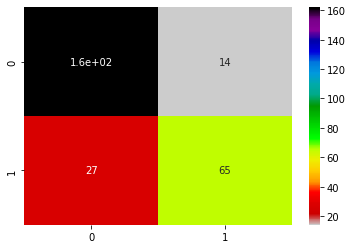

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, preds)
print(f'Confusion Matrix: \n{cm}')

sns.heatmap(cm, annot=True, cmap='nipy_spectral_r')

In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


my_model1 = XGBClassifier(random_state = 11)
my_model1.fit(X_train, y_train)

preds = my_model1.predict(X_test)
acc = (accuracy_score(y_test, preds))* 100
print(f'Accuracy Score: {acc:.2f}%')


Accuracy Score: 84.70%


Confusion Matrix: 
[[160  16]
 [ 25  67]]


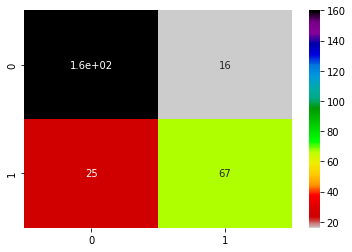

In [9]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, preds)
print(f'Confusion Matrix: \n{cm}')

sns.heatmap(cm, annot=True, cmap='nipy_spectral_r')